In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [4]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Capítulo 10 - O projeto de sistemas de controle com retroação

## Introdução

O desempenho de um sistema de controle é de fundamental importância. Comumente, quando não é possível obter todas as especificações desejadas, torna-se necessário estabelecer um compromisso entre as diversas especificações requeridas e conflitantes e proceder ao ajuste dos parâmetros do sistema de modo a alcançar um desempenho aceitável.

O projeto de um sistema de controle trata da concepção e da realização da estrutura do sistema e da seleção de componentes e de parâmetros adequados. Por exemplo, ao se desejar que um conjunto de medidas de desempenho possua valores inferiores aos especificados, ocorrem muitas vezes requisitos conflitantes.

A alteração ou o ajuste de um sistema de controle com a finalidade de obter um desempenho adequado é chamada de compensação, isto é, a compensação é o ajuste de um sistema com a finalidade de corrigir deficiências ou inadequações.

Ao se reprojetar um sistema de controle de modo a alterar a resposta, insere-se um componente adicional na estrutura do sistema com retroacão. É este componente ou dispositivo adicional que equaliza ou compensa a deficiência de desempenho. O dispositivo de compensação pode ser elétrico, mecânico, hidráulico, pneumático ou algum outro tipo de dispositivo ou estrutura e é frequentemente chamado de compensador. Os circuitos elétricos servem comumente como compensadores em muitos sistemas de controle.

Um compensador é um componente ou circuito adicional que é inserido em um sistema de controle para compensar uma deficiência de desempenho.

## Abordagens ao projeto de sistemas

O desempenho de um sistema de controle pode ser descrito em termos de medidas de desempenho no domínio do tempo ou de medidas de desempenho no domínio de frequência. O desempenho de um sistema pode ser especificado requerendo-se um certo tempo de pico, $T_p$, um valor máximo de ultrapassagem e um tempo de assentamento para uma entrada em degrau. Além disto, é necessário,
usualmente, especificar o valor máximo admissível do erro estacionário para diversas entradas de sinais de teste e entradas de perturbações.

Quando o lugar das raízes não resulta em uma configuração adequada, deve-se adicionar uma estrutura de compensação para alterar o lugar das raízes em função da variação de um parâmetro. Por conseguinte, pode-se usar o método do lugar das raízes e determinar a função de transferência da estrutura adequada de modo que o lugar das raízes resultante conduza à configuração desejada de raízes a malha fechada.

Alternativamente, pode-se descrever o desempenho de um sistema de controle com retroação em termos de medidas de desempenho no domínio de frequência. Assim, um sistema pode ser descrito em termos do valor de pico da resposta de frequência a malha fechada, $M_{p\omega}$, da frequência de ressonância, $\omega_r$, da banda passante e da margem de fase do sistema. Pode-se acrescentar uma estrutura de compensação adequada, se necessário, a fim de satisfazer as especificações do sistema.

O projeto de um sistema diz respeito à alteração da resposta de frequência ou do lugar das raízes do sistema a fim de obter um desempenho adequado. Os métodos de resposta de frequência tratam de alterar o sistema de modo que a resposta de frequência do sistema compensado satisfaça as especificações.

O projeto de um sistema de controle pode ser realizado no plano $s$ através de métodos do lugar das raízes. No caso do plano $s$, o projetista deseja mudar e reconfigurar o lugar das raízes de modo que as raízes do sistema estejam localizadas na posição desejada do plano $s$.

Frequentemente, na prática, o modo mais simples e melhor de aumentar o desempenho de um sistema de controle é alterar, se possível, o próprio processo a controlar. Isto é, se o projetista do sistema for capaz de especificar e alterar o projeto do processo que está representado pela função de transferência $G(s)$, então o desempenho do sistema pode ser melhorado imediatamente.

## Estruturas de compensação em cascata

A estrutura de compensação, $G_c(s)$, é inserida em cascata com o processo inalterável $G(s)$ a fim de se obter uma função de transferência de malha $G_c(s)G(s)H(s)$ apropriada. O compensador $G_c(s)$ pode ser escolhido seja para alterar a forma do lugar das raízes, seja para modificar a resposta de frequência. Em ambos os casos, pode-se escolher a estrutura como tendo a função de transferência:

$$
G_c(s) = \frac{K\prod^M_{i=1}(s + z_i)}{\prod^N_{j=1}(s + p_j)}
$$

O problema se reduz então à escolha acertada dos pólos e zeros do compensador. Para ilustrar as propriedades da estrutura de compensação, será considerado um compensador de primeira ordem. A abordagem de compensação desenvolvida com base em um compensador de primeira ordem pode ser estendida a compensadores de ordem elevada, por exemplo, inserindo vários compensadores de primeira ordem em cascata.

Um compensador, $G_c(s)$, é usado com um processo a controlar $G(s)$ de modo que o ganho de malha total possa ser ajustado para satisfazer os requisitos de erro estacionário, e em seguida $G_c(s)$ é usado para ajustar favoravelmente a dinâmica do sistema sem afetar o erro de estado estacionário. Considere-se o compensador de primeira ordem com a função de transferência:

$$
G_c(s) = \frac{K(s+z)}{(s + p)}
$$

O problema de projeto se converte, então, em escolher $z$, $p$ e $K$ a fim de se obter um desempenho apropriado. Quando $|z| < |p|$, a estrutura é chamada de estrutura de avanço de fase e possui a configuração de pólos e zeros no plano $s$. Se o pólo for insignificante, isto é, $|p| >> |z|$ e o zero ocorrer na origem do plano $s$, ter-se-á um derivador tal que:

$$
G_c(s) \simeq \begin{pmatrix}
\frac{K}{p}
\end{pmatrix}s
$$

## Projeto de avanço de fase usando diagramas de Bode

Os diagramas de Bode são usados preferencialmente, em relação a outros gráficos de resposta de frequência, para projetar uma estrutura de avanço de fase. A resposta de frequência da estrutura de compensação em cascata é adicionada à resposta de frequência do sistema não compensado.

A estrutura de compensação é determinada adotando-se os seguintes passos:

1. Calcular a margem de fase do sistema sem compensação para a qual as constantes de erro sejam satisfatórias.
2. Determinar o avanço de fase adicional necessário, $\phi_m$, acrescentando uma pequena folga por medida de segurança.
3. Calcular o valor de $\alpha$.
4. Calcular $10 \log \alpha$ e determinar a frequência em que a magnitude da curva sem compensação é igual a $- 10 \log\alpha$ dB. Como a estrutura de compensação oferece um ganho de $10 \log\alpha$ em $\omega_m$, esta
frequência passa a ser, simultaneamente, a nova frequência de cruzamento de O dB e $\omega_m$.
5. Calcular o pólo $p=\omega_m \sqrt{\alpha}$ e o zero $z=p/\alpha$.
6. Desenhar a resposta de frequência compensada, verificar a margem de fase resultante e repetir os passos anteriores, se necessário. Finalmente, para um projeto aceitável, aumentar o ganho do amplificador a fim de levar em conta a atenuação $(1/\alpha)$.

## Projeto de avanço de fase usando o lugar das raízes

O projeto de uma estrutura de compensação por avanço de fase também pode ser realizado rapidamente usando-se o lugar das raízes. A estrutura de avanço de fase possui uma função de transferência:

$$
G_c(s) = \frac{[s+(1/\alpha\tau)]}{[s+(1/\tau)]} = \frac{(s+z)}{(s+p)}
$$

onde $\alpha$ e $\tau$ são definidos no caso da estrutura RC. As localizações do pólo e do zero são escolhidas de modo que o lugar das raízes do sistema compensado seja satisfatório. As especificações do sistema são utilizadas para especificar a localização desejada para as raízes dominantes do sistema. O método do lugar das raízes no plano $s$ é o seguinte:

1. Listar as especificações do sistema e traduzi-las em localização de um conjunto de raízes dominantes.
2. Esboçar o lugar das raízes sem compensação e determinar se o posicionamento desejado das raízes pode ser efetuado com o sistema sem compensação.
3. Se for necessário o uso de um compensador, posicionar o zero da estrutura de avanço de fase diretamente abaixo da localização desejada das raízes (ou à esquerda dos dois primeiros pólos reais).
4. Determinar a localização do pólo de modo que o ângulo total na posição desejada seja 180° e, portanto, esteja sobre o lugar das raízes do sistema compensado.
5. Calcular o ganho global do sistema na localização desejada para a raiz e, em seguida, calcular a constante de erro.
6. Repetir os passos se a constante de erro não for satisfatória.

Portanto, primeiro se escolhe a posição das raízes que se deseja sejam dominantes de modo que satisfaçam as especificações em termos de $\zeta$ e $\omega_n$, como mostrado na figura abaixo(a). O lugar das raízes do sistema sem compensação é esboçado como ilustra a figura abaixo(b). Em seguida, é acrescentado o zero para fornecer um avanço de fase colocando-o à esquerda dos dois primeiros pólos reais. É necessária uma certa cautela, porque o zero não deve alterar a dominância das raízes desejadas, isto é, o zero não deve ser colocado mais perto da origem que o segundo pólo sobre o eixo real, o que daria uma raiz real próxima da origem e dominaria a resposta do sistema. Assim, na figura abaixo(c), constata-se que a raiz desejada está diretamente acima do segundo pólo e que se coloca o zero $z$ um pouco à esquerda do segundo pólo real.

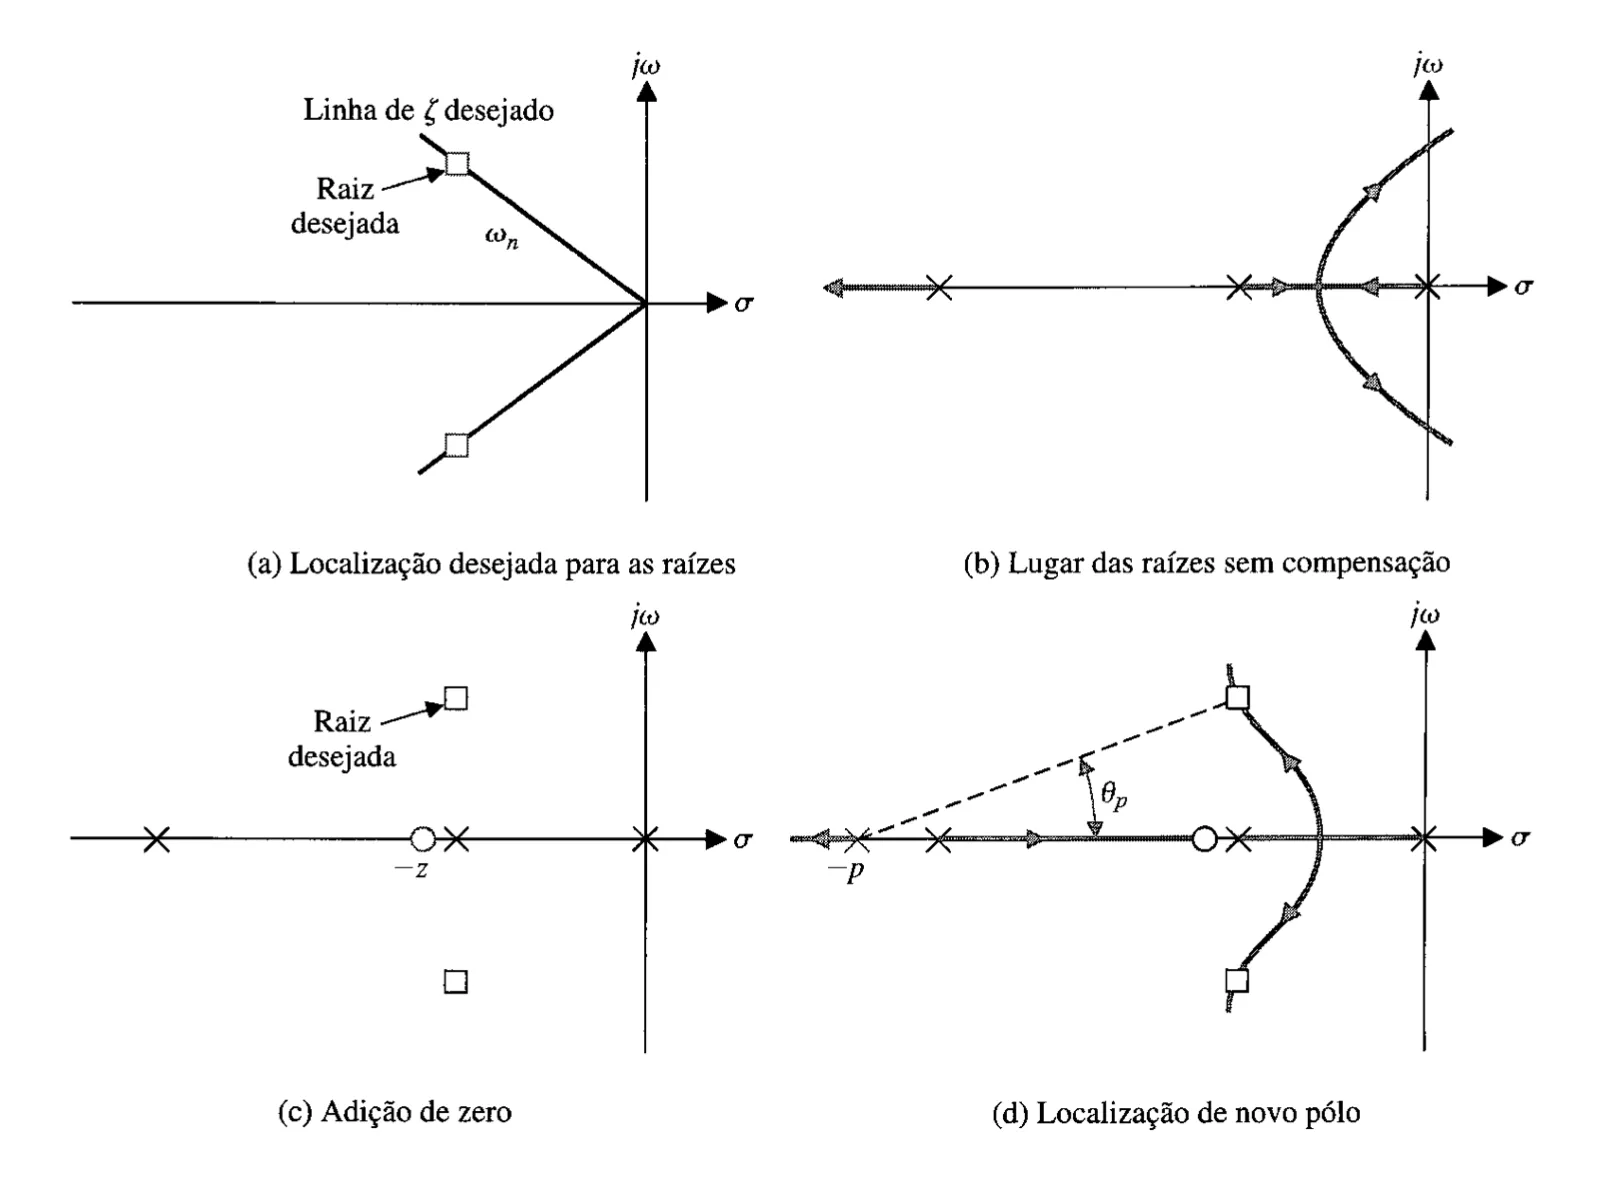

## Projeto de sistemas usando estruturas de integração

Em uma grande percentagem dos sistemas de controle, o objetivo principal é obter uma elevada exatidão em estado estacionário. Um outro objetivo é manter o desempenho transitório destes sistemas
dentro de limites razoáveis.

Considere-se o sistema de controle mostrado na figura abaixo:

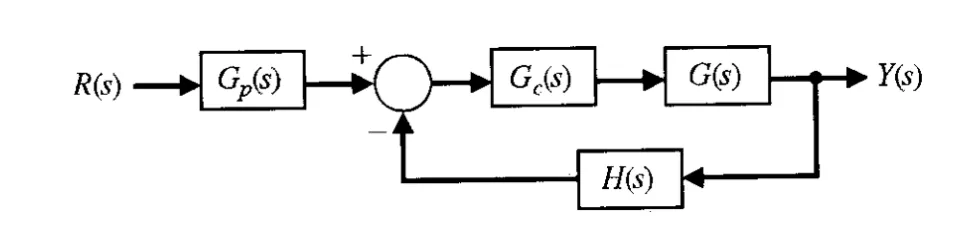



A estrutura de compensação deve ser escolhida de modo a propiciar uma constante de erro com valor elevado. O erro de estado estacionário deste sistema é:

$$
\lim_{t\rightarrow\infin} e(t) = \lim_{s\rightarrow0}s\begin{bmatrix}
\frac{R(s)}{1 + G_c(s)G(s)H(s)}
\end{bmatrix}
$$

O erro de estado estacionário de um sistema depende do número de pólos na origem existentes em $G_c(s)G(s)H(s)$. Um pólo na origem pode ser considerado como uma integração, por conseguinte, a exatidão em estado estacionário de um sistema depende, em essência, do número de integrações na função de transferência $G_c(s)G(s)H(s)$. Se a exatidão em estado estacionário não for suficiente, será introduzida uma estrutura do tipo integração $G_c(s)$ com o objetivo de compensar a falta de integração da função de transferência original $G(s)H(s)$.

O controlador proporcional e integral (PI), uma das formas largamente utilizadas, possui uma função de transferência:

$$
G_c(s) = K_p + \frac{K_1}{s}
$$

Como exemplo, considere-se um sistema de controle de temperatura no qual a função de transferência $H(s) = 1$ e a função de transferência do processo térmico seja:

$$
G(s) = \frac{K_1}{(\tau_1s + 1)(\tau_2s + 1)}
$$

O erro de estado estacionário do sistema sem compensação é, então:

$$
\lim_{t\rightarrow\infin} e(t) = \lim_{s\rightarrow0}s\begin{bmatrix}
\frac{A/s}{1 + G(s)H(s)}
\end{bmatrix} = \frac{A}{1+K_1}
$$

## Projeto de atraso de fase usando o lugar das raízes

Os passos necessários para se projetar, no plano s, uma estrutura de atraso de fase são os seguintes:

1. Obter o lugar das raízes do sistema sem compensação.
2. Determinar as especificações da resposta transitória do sistema e determinar o posicionamento adequado das raízes dominantes sobre o lugar das raízes sem compensação que permitam atender as especificações.
3. Calcular o ganho de malha na localização desejada para a raiz e assim a constante de erro do sistema.
4. Comparar a constante de erro do sistema sem compensação com a constante de erro desejada e calcular o acréscimo necessário que deve resultar da relação, $\alpha$, entre o pólo e o zero do compensador.
5. Com a relação conhecida da combinação pólo-zero do compensador, determinar uma localização adequada para o pólo e o zero do compensador de modo que o lugar das raízes do sistema compensado continue passando pelo local da raiz desejada. Posicionar o pólo e o zero do compensador próximos da origem do plano $s$ em comparação com $\omega_n$.

O quinto requisito pode ser satisfeito se as magnitudes do pólo e do zero forem significativamente menores que o valor $\omega_n$, das raízes dominantes e que pareçam se fundir em um único ponto a partir da posição das raízes desejadas. O pólo e o zero parecerão fundir-se em um único ponto na localização raízes se os ângulos, com base no pólo e no zero do compensador, medidos na localização desejada, forem essencialmente iguais. Um método para se localizar o pólo e o zero do compensador se baseia no requisito de que a diferença entre o ângulo devido ao pólo e o ângulo devido ao zero, medidos na posição desejada para a raiz, seja menor que 2°.

## Projeto de atraso de fase usando diagramas de Bode

O projeto de um circuito RC adequado para a compensação de um sistema de controle com retroação pode ser realizado rapidamente em diagramas de Bode. A vantagem dos diagramas de Bode é de novo evidente, pois será simplesmente adicionada a resposta de frequência do compensador aos diagramas de Bode do sistema sem compensação com o objetivo de obter uma resposta de frequência satisfatória para o sistema. A função de transferência da estrutura de atraso de fase escrita sob a forma adequada aos diagramas de Bode é:

$$
G_c(j\omega) = \frac{1 + j\omega\tau}{1+ j\omega\alpha\tau}
$$

Nos diagramas de Bode, o pólo e o zero do compensador possuem uma magnitude muito menor que o menor dos pólos do sistema não compensado. Portanto, o atraso de fase não é o efeito útil do compensador, é a atenuação $-20 \log \alpha$ que é o efeito útil da compensação. A estrutura de atraso de fase é utilizada para fornecer uma atenuação e, por conseguinte, abaixar a frequência de $0$ dB (frequência de cruzamento) do sistema. Por outro lado, com frequências de cruzamento mais baixas, constata-se que usualmente a margem de fase é aumentada e as especificações podem ser satisfeitas.

O procedimento de projeto de uma estrutura de atraso de fase em diagramas de Bode é o seguinte:

1. Obter os diagramas de Bode do sistema sem compensação com o ganho ajustado para as constantes de erro desejadas.
2. Determinar a margem de fase do sistema sem compensação e, se for insuficiente, prosseguir com os passos a seguir.
3. Determinar a frequência em que o requisito de margem de fase deve ser satisfeito se a curva de magnitude cruza a linha de $0$ dB nesta frequência, $\omega_c$. (Adicionar uma tolerância de 5° no atraso de fase da estrutura de atraso de fase ao determinar a nova frequência de cruzamento.)
4. Posicionar o zero do compensador uma década abaixo da nova frequência de cruzamento $\omega_c$ e assim assegurar somente 5° de atraso de fase em $\omega_c$ devido à estrutura de atraso de fase.
5. Medir a atenuação necessária em $\omega_c$ de modo a assegurar que a curva de magnitude cruze a linha de $0$ dB nesta frequência.
6. Calcular o valor de a levando em conta que a atenuação introduzida em $\omega_c$ pela estrutura de atraso de fase é $-20 \log \alpha$.
7. Calcular o pólo como $\omega_p = 1/\alpha\tau = \omega_z/\alpha$ e o projeto estará concluído.

## Projeto de sistemas com diagramas de Bode usando métodos analíticos e computacionais

O uso de computadores é desejável, quando apropriado, para auxiliar o projetista na seleção dos parâmetros de um controlador. O desenvolvimento de algoritmos para o projeto assistido por computador constitui uma abordagem alternativa importante aos métodos de tentativa e erro. Foram desenvolvidos programas de computador para a seleção de valores adequados de parâmetros para compensadores baseados no atendimento de critérios de resposta de frequência, como a margem de fase.

São as seguintes as etapas de projeto de um compensador por avanço de fase:

1. Selecionar o valor desejado de $\omega_c$.
2. Determinar a margem de fase desejada e, em consequência, a fase necessária $\phi$.
3. Verificar se o avanço de fase é aplicável: $\phi > 0$ e $M > 0$.
4. Determinar se um único estágio é suficiente quando $c > p^2 + 1$.
5. Determinar $\alpha$.
6. Determinar $\tau$.

Se for necessário projetar um compensador por atraso de fase de um único estágio, então $\phi <0$ e $M <0$ (passo 3). Para o passo 4 será necessário $c < [1/(1 + p^2)]$. Quanto ao resto, o método é o mesmo.

## Projeto para resposta rápida sem oscilação

Frequentemente o objetivo de um sistema de controle é obter uma resposta rápida para um comando em degrau, com um mínimo de ultrapassagem. Define-se como resposta rápida sem oscilação uma resposta que alcança rapidamente o nível desejado e se mantém nesse nível com um mínimo de oscilações. Utiliza-se a faixa de $\pm 2 \%$ em torno do nível desejado como faixa aceitável de variação da resposta desejada. Então, se a resposta entra na faixa no instante $T_s$, ela satisfez o tempo de assentamento $T_s$, ao entrar na faixa. Uma resposta rápida sem oscilação possui as seguintes características:

1. Erro de estado estacionário = 0.
2. Resposta rápida $\rightarrow$ tempo de subida e tempo de assentamento mínimos.
3. $0,1\% \leq$ ultrapassagem percentual $< 2\%$
4. amplitude de oscilação inferior (*undershoot*) $<2\%$

As características (3) e (4) necessitam que a resposta permaneça no interior da faixa de $\pm 2\%$ de modo que a entrada da resposta no interior da faixa ocorra no tempo de assentamento.

## Projeto de sistemas usando Matlab

### Sistema de controle de enrolamento de motor

O objetivo de projeto é alcançar uma exatidão elevada em estado estacionário para uma entrada em rampa. O erro de estado estacionário para uma entrada em rampa unitária, $R(s) = 1/s^2$, é:

$$
e_{ss} = \frac{1}{K_v}
$$

onde:

$$
K_v = \lim_{s\rightarrow0} \frac{G_c(s)}{50}
$$

A especificação de desempenho relativa à ultrapassagem e ao tempo de assentamento deve ser considerada, bem como o erro de acompanhamento em estado estacionário. Como é altamente provável
que um simples ganho não seja satisfatório, será considerada a compensação utilizando compensadores de avanço e de atraso de fase, usando-se tanto os métodos dos diagramas de Bode como o do
traçado do lugar das raízes. A abordagem consiste em desenvolver uma série de scripts em MATLAB como auxílio ao projeto de compensadores. Considere-se primeiramente um controlador de ganho simples, $G_c(s)$, onde:

$$
G_c(s) = K
$$

O erro de estado estacionário é:

$$
e_{ss} = \frac{50}{K}
$$

Quanto maior for o valor de $K$, menor será o erro de estado estacionário $e_{ss}$ Contudo, deve-se levar em conta o efeito que o aumento de $K$ tem sobre a resposta transitória. Quando $K = 500$, o erro de estado estacionário para uma rampa é de $10\%$, mas, para uma entrada em degrau a ultrapassagem é de $70\%$ e o tempo de assentamento é de aproximadamente 8 segundos. Considera-se isto um desempenho inaceitável e se muda para a compensação. Os dois tipos de compensadores que serão considerados são os compensadores de avanço e de atraso de fase. Será tentado inicialmente um compensador por avanço de fase:

$$
G_c(s) = \frac{K(s+ z)}{(s + p)}
$$

Os passos que conduzem ao projeto final são os seguintes:

1. Obter os diagramas de Bode do sistema sem compensação com $K = 500$ e calcular a margem de fase.
2. Determinar o acréscimo necessário de avanço de fase.
3. Calcular a a partir de $sen\ \phi_m=(\alpha - 1/(\alpha + 1)$.
4. Calcular $10 \ \log \alpha$ e determinar a frequência $\omega_m$ nos diagramas de Bode sem compensação onde a curva de magnitude é igual a $-10 \log \alpha$.
5. Na vizinhança de $\omega_m$, nos diagramas de Bode sem compensação, traçar uma reta cruzando a linha de 0 dB no ponto relativo a $\omega_m$, com uma inclinação igual à inclinação corrente mais 20 dB/década. Marcar a interseção da reta com o diagrama de Bode sem compensação para determinar a localização do zero da compensação por avanço de fase. Calcular, em seguida, a posição do pólo do compensador por avanço de fase em $p=\alpha z$.
6. Obter os diagramas de Bode compensados e verificar a margem de fase. Repetir quaisquer dos passos, se necessário.
7. Aumentar o ganho para levar em conta a atenuação $(1/\alpha)$.
8. Verificar o projeto final por meio de simulação usando funções em degrau e repetir quaisquer passos se necessário.

```matlab
K=[50 100 200 500];
numg=[1];
deng=[1 15 50 0];
t=[0:0.1:5];

for i=1:4
    [nums,dens]=series(K(i),1,numg,deng);
    [num,den]=cloop(nums,dens);
    [y,x]=step(num,den,t);
    Ys(:,i)=y;
end

plot(t,Ys(:,1),'-',t,Ys(:,2),'-',t,Ys(:,3),'-',t,Ys(:,4),'-')
xlabel('Tempo (s)'), ylabel('y(t)')
```

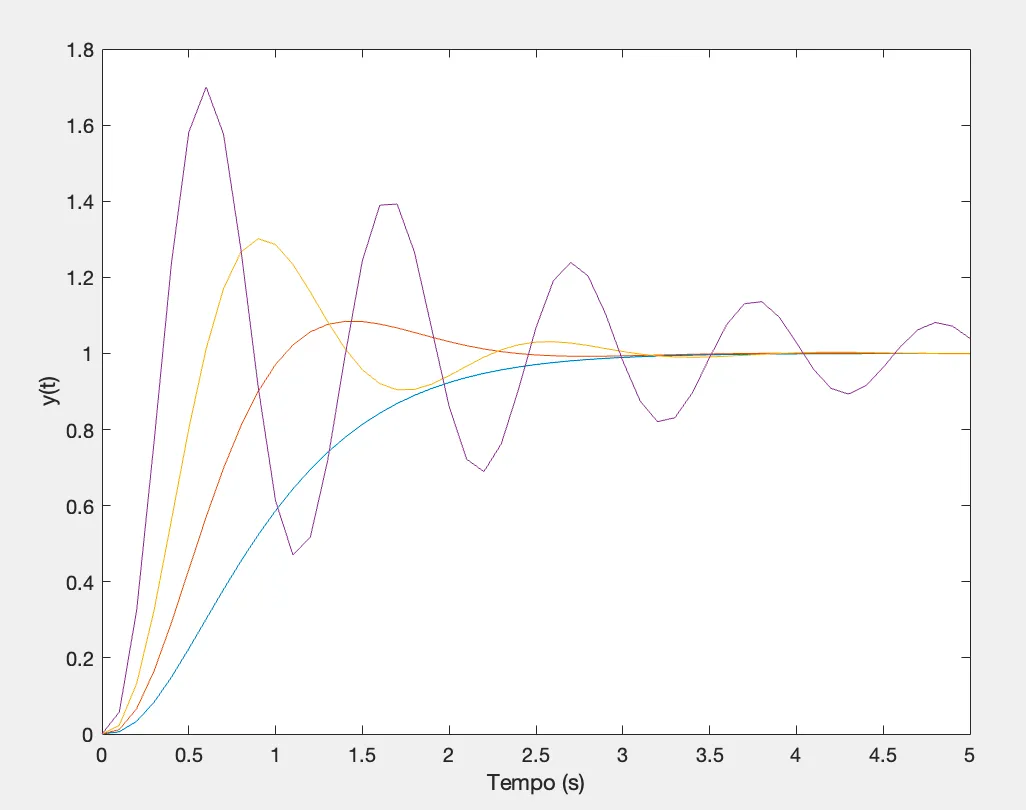

### **Traduzindo para python**

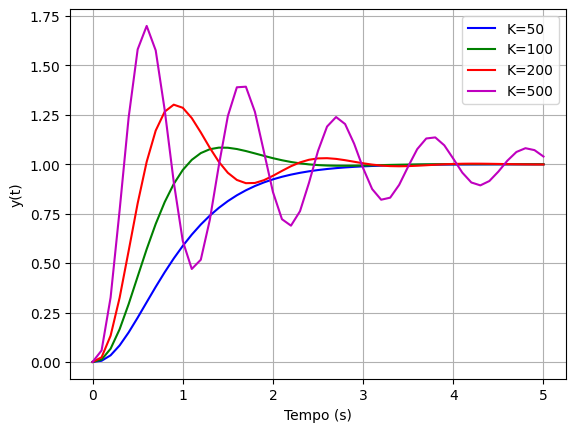

In [15]:
# Definindo os valores de ganho K
K = [50, 100, 200, 500]

# Definindo o numerador e denominador da função de transferência G(s)
numerador = [1]
denominador = [1, 15, 50, 0]

# Definindo o vetor de tempo t
t = np.arange(0, 5.1, 0.1)

# Criando a figura para o gráfico
plt.figure()

# Definindo as cores para cada curva
cores = ['b', 'g', 'r', 'm']  # Azul, Verde, Vermelho, Magenta

# Loop para simular a resposta ao degrau para cada valor de K
for i, k in enumerate(K):
    # Calcula o numerador da função de transferência em série (K * G(s))
    num_serie = np.polymul(numerador, [k])

    # Calcula o denominador da função de transferência de malha fechada (denominador + K * numerador)
    den_serie = np.polyadd(denominador, np.polymul([k], [1]))

    # Cria o sistema de tempo linear (LTI) usando as funções de transferência calculadas
    sistema = lti(num_serie, den_serie)

    # Simula a resposta ao degrau do sistema
    t_out, y = step(sistema, T=t)

    # Plota a resposta ao degrau para o valor de K atual
    plt.plot(t_out, y, '-', color=cores[i], label=f'K={k}')

# Adiciona rótulos aos eixos do gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')

# Adiciona a legenda ao gráfico
plt.legend()

# Adiciona a grade ao gráfico
plt.grid()

# Exibe o gráfico
plt.show()

```matlab
K=500;
numg=[1];
deng=[1 15 50 0];
w=logspace(-1,2,200);
[mag,phase,w]=bode(num,den,w);
[Gm,Pm,Wcg,Wcp]=margin(mag,phase,w);

Phi=(60-Pm)*pi/180;

alpha=(1+sin(Phi))/(1-sin(Phi));

M=-10*log10(alpha)*ones(length(w), 1);

[mag,phase,w]=bode(num,den,w);
semilogx(w,20*log10(mag),w,M), grid
xlabel('frequencia [rad/s]'), ylabel('mag [dB]')
```

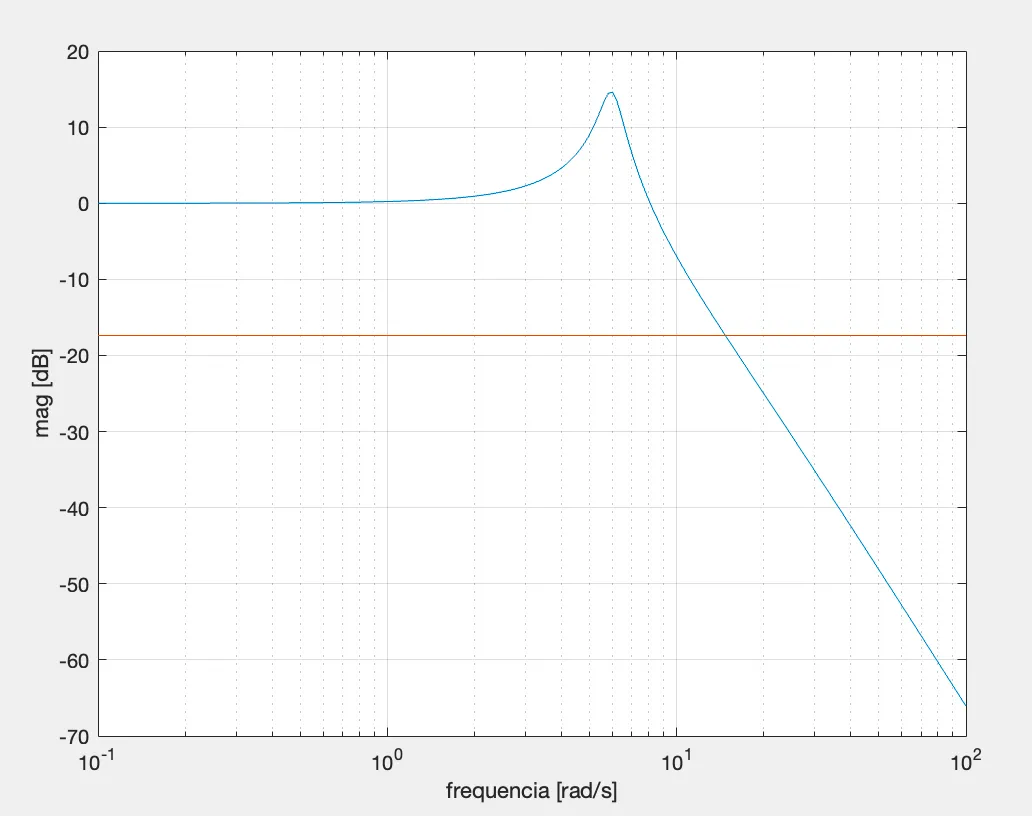

### **Traduzindo para python**

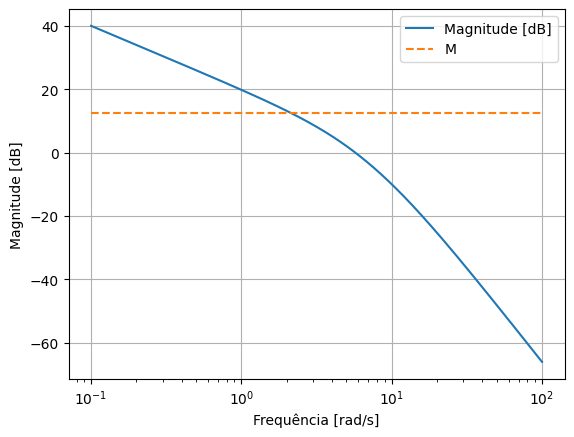

In [9]:
# Definir os parâmetros do sistema
K = 500
numg = [1]
deng = [1, 15, 50, 0]

# Criar a função de transferência do sistema em malha aberta
num = [K * numg[0]]
den = deng
sys = ct.TransferFunction(num, den)

# Gerar a faixa de frequências
w = np.logspace(-1, 2, 200)

# Calcular a resposta em frequência usando Bode
mag, phase, w = ct.bode(sys, w, plot=False)
mag_db = 20 * np.log10(mag)
phase_deg = phase

# Encontrar os índices para margem de fase e de ganho
# Margem de fase: frequência onde a magnitude é próxima de 0 dB
index_cp = np.argmin(np.abs(mag_db))
Pm = 180 + phase_deg[index_cp]
Wcp = w[index_cp]

# Margem de ganho: frequência onde a fase é próxima de -180 graus
index_cg = np.argmin(np.abs(np.array(phase_deg) + 180))
mag_at_cg = mag[index_cg]
Gm = 20 * np.log10(1 / mag_at_cg) if mag_at_cg != 0 else np.inf
Wcg = w[index_cg]

# Calcular os parâmetros para o gráfico
Phi = (60 - Pm) * np.pi / 180
alpha = (1 + np.sin(Phi)) / (1 - np.sin(Phi))
M = -10 * np.log10(alpha) * np.ones_like(w)

# Plotar os resultados
plt.figure()
plt.semilogx(w, mag_db, label='Magnitude [dB]')
plt.semilogx(w, M, '--', label='M')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()

```matlab
K=1800;
numg=[1];
deng=[1 15 50 0];
numgc=K*[1 3.5];
dengc=[1 25];
[num,den]=series(numgc,dengc,numg,deng);
w=logspace(-1,2,200);
[mag,phase,w]=bode(num,den,w);
[Gm,Pm,Wcg,Wcp]=margin(mag,phase,w);

bode(num,den)
title(['Margem de ganho = ',num2str(Gm),'Margem de fase = ', num2str(Pm)])
```

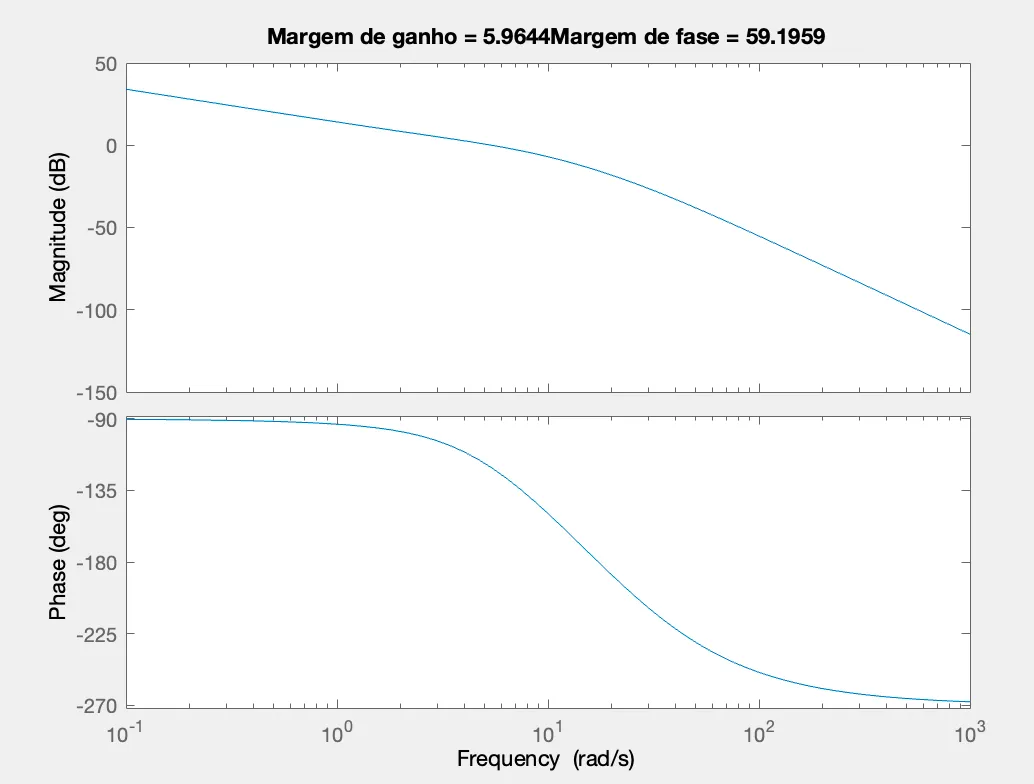

### **Traduzindo para python**

<ipython-input-42-8c985597bca9>:27: RuntimeWarning: invalid value encountered in log10
  plt.semilogx(w, 20 * np.log10(mag))


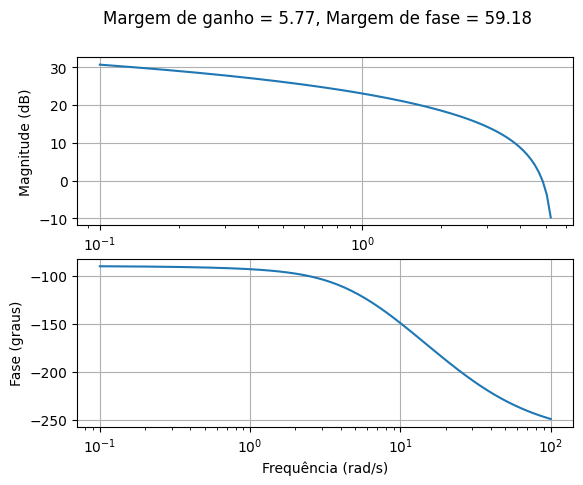

In [42]:
# Definindo os parâmetros
K = 1800
numg = [1]
deng = [1, 15, 50, 0]
numgc = K * np.array([1, 3.5])
dengc = [1, 25]

# Calculando a função de transferência em série
num_serie = np.polymul(numgc, numg)
den_serie = np.polymul(dengc, deng)

# Criando o sistema LTI
sistema = lti(num_serie, den_serie)

# Definindo o vetor de frequências
w = np.logspace(-1, 2, 200)

# Calculando o diagrama de Bode
w, mag, phase = bode(sistema, w)

# Calculando as margens de ganho e fase
gm, pm, wcg, wcp = margin(mag, phase, w)

# Plotando o diagrama de Bode
plt.figure()
plt.subplot(2, 1, 1)  # Subplot para magnitude
plt.semilogx(w, 20 * np.log10(mag))
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)  # Subplot para fase
plt.semilogx(w, phase)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True)

# Adicionando título com as margens de ganho e fase
plt.suptitle(f'Margem de ganho = {gm:.2f}, Margem de fase = {pm:.2f}')

plt.show()

```matlab
K=1800;
numg=[1];
deng=[1 15 50 0];
numgc=K*[1 3.5];
dengc=[1 25];
[nums,dens]=series(numgc,dengc,numg,deng);
[num,den]=cloop(nums,dens);

t=[0:0.01:2];
step(num,den,t)
ylabel('y(t)')
```

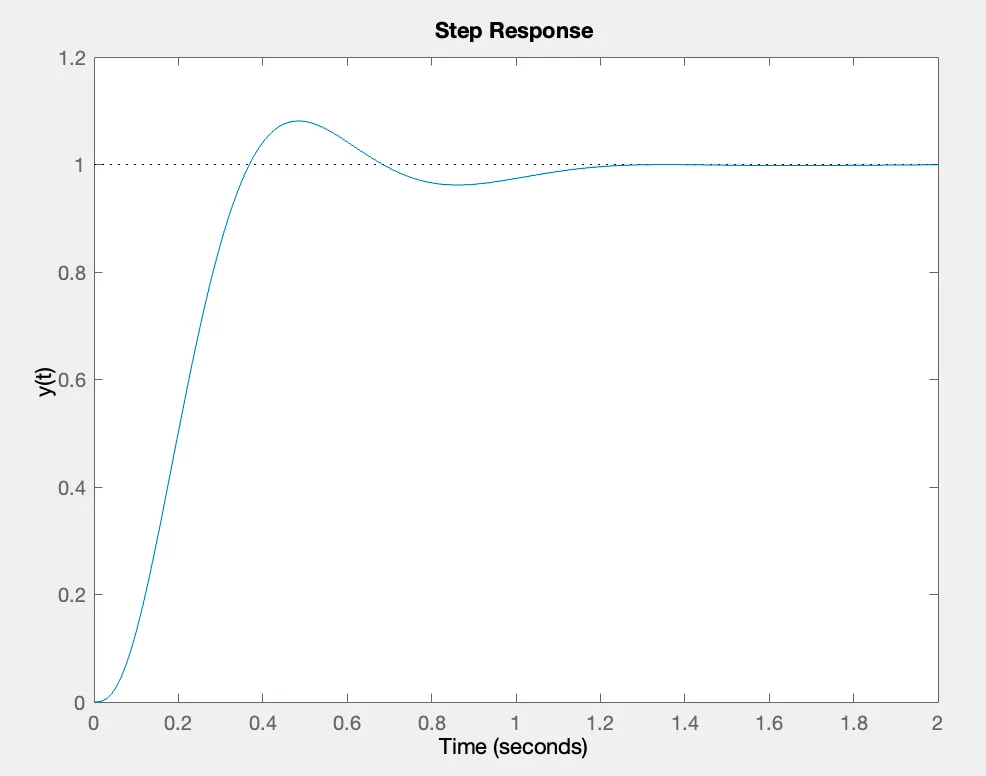

### **Traduzindo para python**

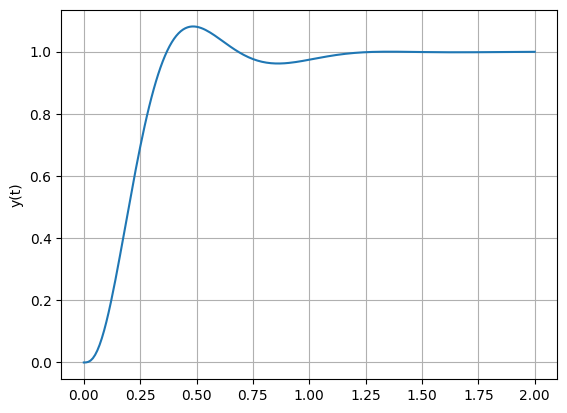

In [44]:
# Definindo os parâmetros
K = 1800
numg = [1]
deng = [1, 15, 50, 0]
numgc = K * np.array([1, 3.5])
dengc = [1, 25]

# Calculando a função de transferência em série
num_serie = np.polymul(numgc, numg)
den_serie = np.polymul(dengc, deng)

# Calculando a função de transferência de malha fechada
num_malha_fechada = num_serie
den_malha_fechada = np.polyadd(den_serie, num_serie)

# Criando o sistema LTI
sistema = lti(num_malha_fechada, den_malha_fechada)

# Definindo o vetor de tempo
t = np.arange(0, 2.01, 0.01)

# Simulando a resposta ao degrau
t_out, y = step(sistema, T=t)

# Plotando a resposta ao degrau
plt.plot(t_out, y)
plt.ylabel('y(t)')
plt.grid(True)
plt.show()

Foram utilizados três scripts no projeto. Os scripts de projeto estão mostrados acima. O primeiro script é relativo aos diagramas de Bode do sistema sem compensação, como mostrado no script 1. Os diagramas de Bode detalhados do sistema compensado estão mostrados no script 2. O script 3 mostra um script em MATLAB para a análise da resposta ao degrau. O projeto final do compensador por avanço de fase é:

$$
G_c(s) = \frac{1800(s+3,5)}{(s+25)}
$$

onde $K = 1800$ foi escolhido depois de se utilizar interativamente o script em MATLAB.

As especificações de tempo de assentamento e de ultrapassagem são satisfeitas, mas o valor resultante de $K_v = 5$ produz um erro estacionário de 20% para uma entrada em rampa. É possível continuar a interação de projeto e refinar um pouco mais o compensador, embora deva ficar claro que o compensador por avanço de fase adicionou uma margem de fase e melhorou a resposta transitória, como fora antecipado.

Para reduzir o erro de estado estacionário, deve-se considerar o compensador por atraso de fase, que possui a forma:

$$
G_c(s) = \frac{K(s+z)}{(s+p)}
$$

## Conclusão

Foi visto no capítulo algumas abordagens alternativas para o projeto de sistemas de controle com retroação. Foi visto a possibilidade de utilização de estruturas de compensação em cascata nas malhas de retroação, que são úteis para alterar a forma do lugar das raízes ou da resposta de frequência de um sistema.

Foi visto a compensação de sistemas usando uma estrutura de avanço de fase no plano $s$ através dos diagramas de Bode e do lugar das raízes no plano $s$.

Quando as especificações de projeto incluem uma constante de erro, o projeto de uma estrutura de avanço de fase é realizado mais facilmente nos diagramas de Bode. Alternativamente, quando não se especifica a constante de erro mas se especificam o tempo de assentamento e a ultrapassagem da resposta para uma entrada em degrau, o projeto é conduzido de forma mais rápida no plano $s$.

A compensação por avanço de fase aumenta a banda passante do sistema, enquanto a compensação por atraso de fase diminui a banda passante do sistema. A banda passante pode ser muitas vezes um fator importante quando há ruído no sinal de entrada e ruído gerado no interior do sistema.

Circuitos com amplificador operacional de avanço de fase e de atraso de fase e para compensadores PI e PD, estes circuitos com amplificador operacional são usados largamente na prática industrial para implementar o compensador $G_c(s)$.